In [26]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [27]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage, ToolMessage
from typing_extensions import TypedDict

In [28]:
class State(TypedDict):
    messages: list[AnyMessage]
    extra_field: int

In [29]:
def node(state: State):
    messages = state['messages']
    new_message = AIMessage("안녕하세요! 무엇을 도와드릴까요?")

    return {"messages": messages + [new_message], "extra_field": 10}

In [30]:
state_exam = State(
    messages=[HumanMessage(content='안녕', additional_kwargs={}, response_metadata={})], 
    extra_field=10
)

In [31]:
node(state_exam)

{'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}),
  AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})],
 'extra_field': 10}

In [32]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)

graph_builder.add_node("node", node)
graph_builder.set_entry_point("node")

graph = graph_builder.compile()

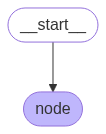

In [33]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
result = graph.invoke({"messages": [HumanMessage("안녕")]})

In [35]:
result

{'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}),
  AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})],
 'extra_field': 10}

In [36]:
result["messages"]

[HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}),
 AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})]

In [37]:
state = State(messages=[('user', '안녕')])

for event in graph.stream(state):
    print('===================' * 10)
    print(event)
    print('===================' * 10)

{'node': {'messages': [('user', '안녕'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})], 'extra_field': 10}}


In [38]:
state2 = State(messages=[HumanMessage('안녕')])

for event in graph.stream(state2):
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')        
        print(f"[assistant 답변]: \n{value}")

    print('===== for  끝 =====')

===== for 시작 =====
[실행된 노드 이름]: node
[assistant 답변]: 
{'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={})], 'extra_field': 10}
===== for  끝 =====


In [39]:
state3 = State(messages=[HumanMessage('안녕')])

for event in graph.stream(state3):
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')        
        print(f"[assistant 답변]: \n{value['messages'][-1].content}")
        
    print('===== for  끝 =====')

===== for 시작 =====
[실행된 노드 이름]: node
[assistant 답변]: 
안녕하세요! 무엇을 도와드릴까요?
===== for  끝 =====


In [40]:
state5 = State(messages=[HumanMessage('안녕')])

for event in graph.stream(state5):
    print()
    print('===== for 시작 =====')

    for k, value in event.items():
        print(f'[실행된 노드 이름]: {k}')
        # print(f"메시지: {value['messages'][-1]}")   

        if isinstance(value['messages'][-1], HumanMessage):
            print('==================== HumanMessage ========================')

            print('==================== END HumanMessage ====================')
            print() 
        elif isinstance(value['messages'][-1], AIMessage):
            print('==================== AIMessage ========================')
            print(f"[해당 노드 값] : \n{value['messages'][-1].content}")
            print('==================== END AIMessage ====================')     
            print()  
        elif isinstance(value['messages'][-1], ToolMessage):
            print('==================== ToolMessage ========================')

            print('==================== END ToolMessage ====================')     
            print()
    print('===== for  끝 =====')  


===== for 시작 =====
[실행된 노드 이름]: node
==================== AIMessage ========================
[해당 노드 값] : 
안녕하세요! 무엇을 도와드릴까요?
==================== END AIMessage ====================

===== for  끝 =====
